# Assignment 2: Sniping Schrödinger

## 1. Quantum Mechanics On The Computer

### a) Write Equation (1) as a system of two first order ODEs.

Eq. 1 as a system of two first order ODEs:

\begin{equation}
  \frac{d}{dx} \begin{pmatrix} y(x) \\ z(x) \end{pmatrix} = \begin{pmatrix} z(x) \\ 2m(V(x)-E)y(x) \end{pmatrix}
\end{equation}

if you let:

\begin{equation}
    \begin{cases}
        y(x) = \Psi(x) \\
        z(x) = \frac{d}{dx} \Psi(x)
    \end{cases}
\end{equation}

### b) Write an RK4 solver in python to solve Equation (1) over the domain [a,b] given $\Psi(a)$ and $\frac{d}{dx}\Psi(a)$ as initial data.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import jax

V = 0.
E = 1.
m = 1.

In [3]:
def rk4(f, t_n, x_n, h=1e-2):
    k_1 = f(t_n, x_n)
    k_2 = f(t_n + h/2, x_n + h/2 * k_1)
    k_3 = f(t_n + h/2, x_n + h/2 * k_2)
    k_4 = f(t_n + h, x_n + h * k_3)
    return x_n + h / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

In [4]:
def func_V(x, V_int):
    if V_int == 0:
        return 0
    else:
        f = lambda x: (m * w**2 * x**2)/2
        return f(x)

def wavefunc(x, y_x, z_x, E, V_int):  #y_x = Psi(x) and z(x) = d/dx Psi(x)

    V = func_V(x, V_int)

    dy_dx = z_x
    dz_dx = 2 * m * (V - E) * y_x
    
    return np.array([dy_dx, dz_dx])

In [62]:
def approx_Schr(interval, N, in_pos, in_vel, E, V_int):
    count = 0
    step_size = (interval[-1] - interval[0])/N
    #print("The step size is:", step_size)
    #print('The number of steps is:', (interval[-1] - interval[0])/step_size)
    
    res_pos = [in_pos]
    res_vel = [in_vel]
    state = np.array([float(in_pos), float(in_vel)])
    pos = float(interval[0])
    xs_approx = [pos]
    
    while count < N:

        f = lambda t, s: wavefunc(t, s[0], s[1], E, V_int)
        state = rk4(f, pos, state, h= step_size)
        
        pos += step_size
        count += 1

        xs_approx.append(pos)
        res_pos.append(state[0])
        res_vel.append(state[1])

    return (xs_approx, res_pos, res_vel)

### c) Check your method on some simple test cases, use at least N  = 1000 steps.  Make a plot of yournumerical solution and the exact solution for each case.

### Test case 1:

In [63]:
approx_xs, approx_pos, approx_vel = approx_Schr([0,10], 1000, 0, 1, E=1, V_int=0)

<>:15: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
<>:15: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
/var/folders/6y/t0pn3j7n35bdz5_644h0yzd00000gn/T/ipykernel_23582/2891892928.py:15: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
  plt.ylabel(f'$\Psi(x)$')


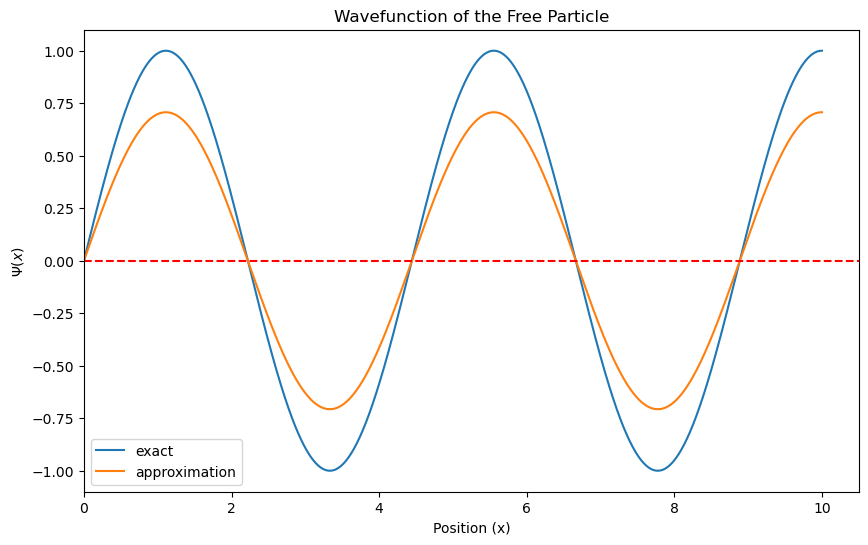

In [70]:
V = 0.
E = 1.
m = 1.

test_f = lambda x: math.sin(np.sqrt(2*m*E)*x)

ys = [test_f(x) for x in approx_xs]

plt.figure(figsize=(10, 6))
plt.plot(approx_xs, ys, label='exact')
plt.plot(approx_xs, approx_pos, label='approximation')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlim(left=0)
plt.title("Wavefunction of the Free Particle")
plt.ylabel(f'$\Psi(x)$')
plt.xlabel("Position (x)")

plt.legend()
plt.show()

#### Find an energy that makes $\Psi(10) \approx 0$.

Given the exact expression of the wavefunction, we have that $\Psi(10) \approx 0$ for $E = \frac{1}{2} (\frac{\pi}{10})^2$.

In [71]:
E_10 = 1/2 * (math.pi/10)**2
E_10

0.04934802200544679

<>:10: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
<>:10: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
/var/folders/6y/t0pn3j7n35bdz5_644h0yzd00000gn/T/ipykernel_23582/140667904.py:10: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
  plt.ylabel(f'$\Psi(x)$')


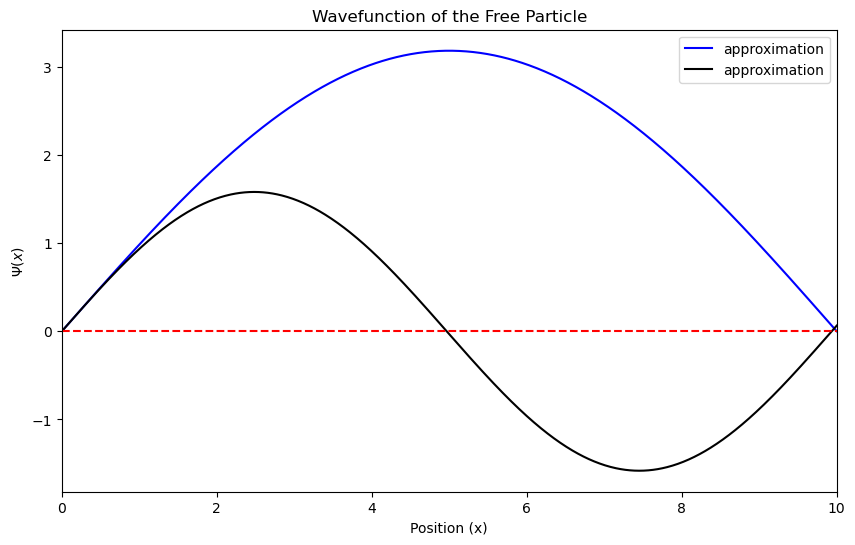

In [72]:
approx_xs, approx_pos, approx_vel = approx_Schr([0,10], 1000, 0, 1, E=E_10, V_int=0)
_, approx_pos1, approx_vel1 = approx_Schr([0,10], 1000, 0, 1, E=.2, V_int=0)

plt.figure(figsize=(10, 6))
plt.plot(approx_xs, approx_pos, color = 'b', label='approximation')
plt.plot(approx_xs, approx_pos1, color = 'k', label='approximation')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlim([approx_xs[0], approx_xs[-1]])
plt.title("Wavefunction of the Free Particle")
plt.ylabel(f'$\Psi(x)$')
plt.xlabel("Position (x)")

plt.legend()
plt.show()

In [73]:
approx_pos[-1], approx_pos1[-1]

(np.float64(8.111809834954187e-12), np.float64(0.06539307721005087))

This expression $E = \frac{1}{2} (\frac{\pi}{10})^2$ yields a satisfying result. 

### Test case 2:

In [74]:
a = 1; w = 1; E_0 = w/2
approx_xs, approx_pos, approx_vel = approx_Schr([-a, a], 1000, 0, 1, E=E_0, V_int=1)

<>:13: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
<>:13: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
/var/folders/6y/t0pn3j7n35bdz5_644h0yzd00000gn/T/ipykernel_23582/3786146334.py:13: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
  plt.ylabel(f'$\Psi(x)$')


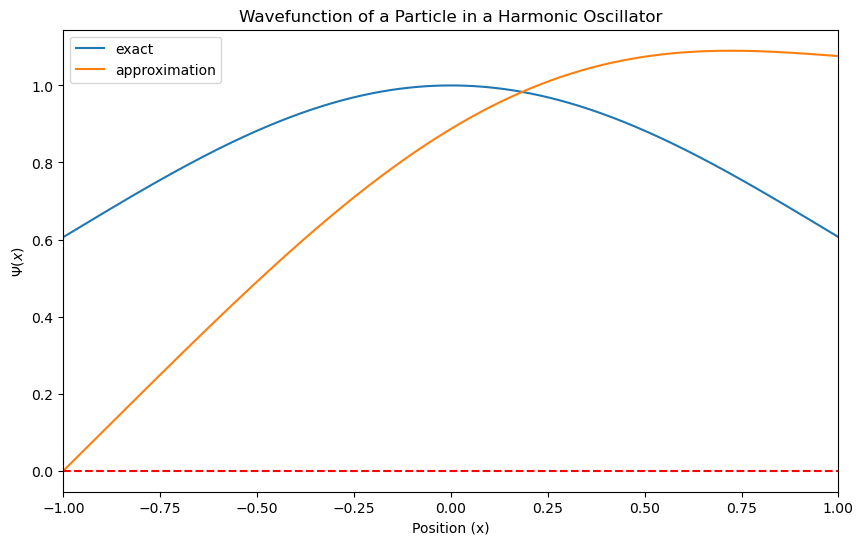

In [75]:
xs = np.linspace(-a, a, 1000)
test_f = lambda x: math.exp(-m * w * x**2 /2)

#ys = [test_f(x) for x in xs]
ys = [test_f(x) for x in approx_xs]

plt.figure(figsize=(10, 6))
plt.plot(approx_xs, ys, label='exact')
plt.plot(approx_xs, approx_pos, label='approximation')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlim([approx_xs[0], approx_xs[-1]])
plt.title("Wavefunction of a Particle in a Harmonic Oscillator")
plt.ylabel(f'$\Psi(x)$')
plt.xlabel("Position (x)")

plt.legend()
plt.show()

In [76]:
a = 6; w = 1; E_0 = w/2
approx_xs, approx_pos, approx_vel = approx_Schr([-a, a], 1000, 0, 1, E=E_0, V_int=1)

<>:12: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
<>:12: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
/var/folders/6y/t0pn3j7n35bdz5_644h0yzd00000gn/T/ipykernel_23582/764734215.py:12: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
  plt.ylabel(f'$\Psi(x)$')


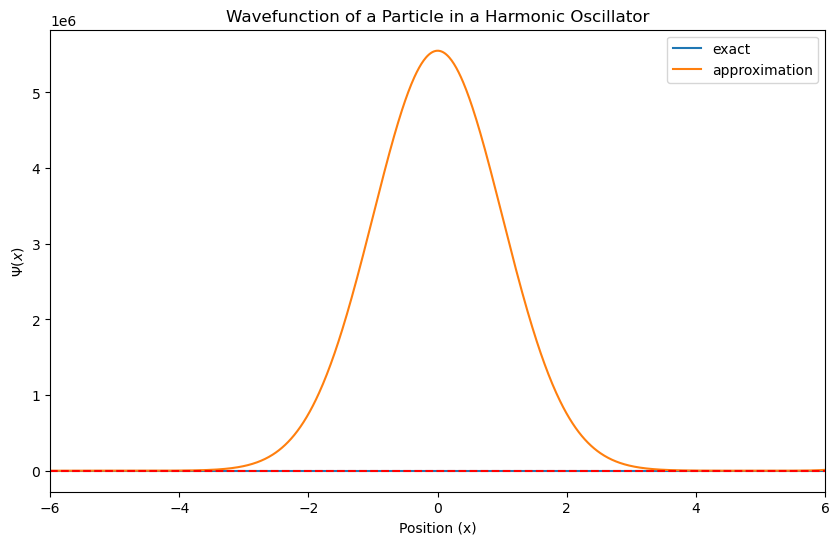

In [77]:
xs = np.linspace(-a, a, 1000)
test_f = lambda x: math.exp(-m * w * x**2 /2)

ys = [test_f(x) for x in approx_xs]

plt.figure(figsize=(10, 6))
plt.plot(approx_xs, ys, label='exact')
plt.plot(approx_xs, approx_pos, label='approximation')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlim([approx_xs[0], approx_xs[-1]])
plt.title("Wavefunction of a Particle in a Harmonic Oscillator")
plt.ylabel(f'$\Psi(x)$')
plt.xlabel("Position (x)")

plt.legend()
plt.show()

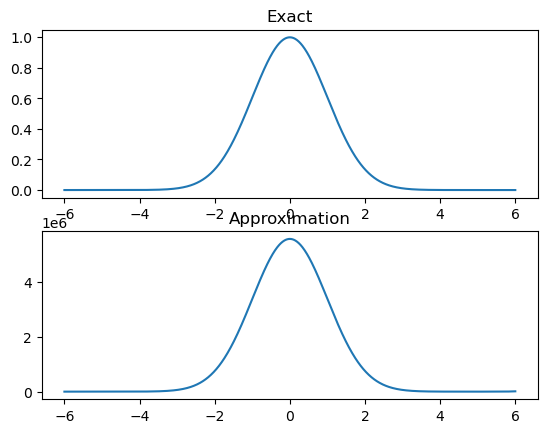

In [78]:
plt.subplot(2, 1, 1)
plt.plot(approx_xs, ys, label='exact')
plt.title('Exact')

plt.subplot(2, 1, 2)
plt.plot(approx_xs, approx_pos, label='approximation')
plt.title('Approximation')


plt.show()

The disparity in amplitude could due normalization (?). Besides that the curve looks similar.

In [79]:
np.max(ys), np.max(approx_pos), approx_pos/np.max(approx_pos)

(np.float64(1.0),
 np.float64(5551063.936047929),
 array([0.00000000e+00, 2.16355989e-09, 4.33797638e-09, ...,
        1.84818731e-03, 1.98163368e-03, 2.12503107e-03], shape=(1001,)))

<>:7: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
<>:7: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
/var/folders/6y/t0pn3j7n35bdz5_644h0yzd00000gn/T/ipykernel_23582/872100362.py:7: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
  plt.ylabel(f'$\Psi(x)$')


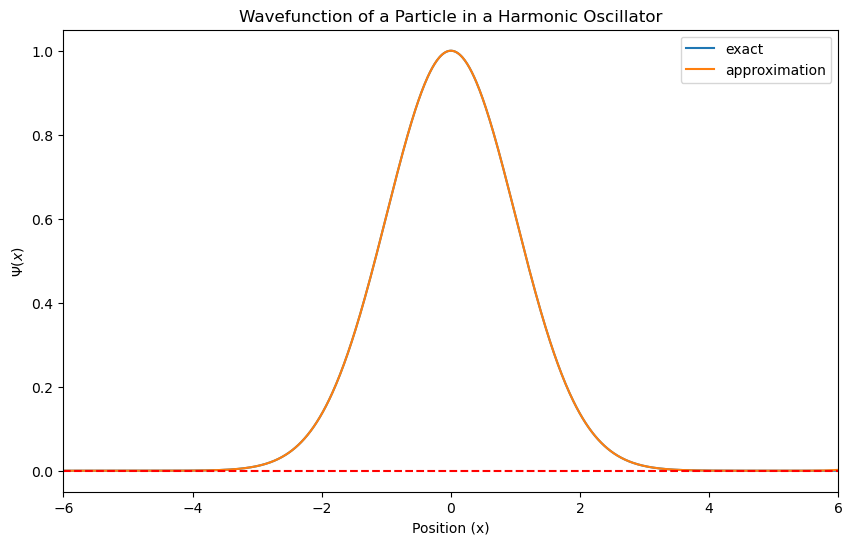

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(approx_xs, ys, label='exact')
plt.plot(approx_xs, approx_pos/np.max(approx_pos), label='approximation')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlim([approx_xs[0], approx_xs[-1]])
plt.title("Wavefunction of a Particle in a Harmonic Oscillator")
plt.ylabel(f'$\Psi(x)$')
plt.xlabel("Position (x)")

plt.legend()
plt.show()

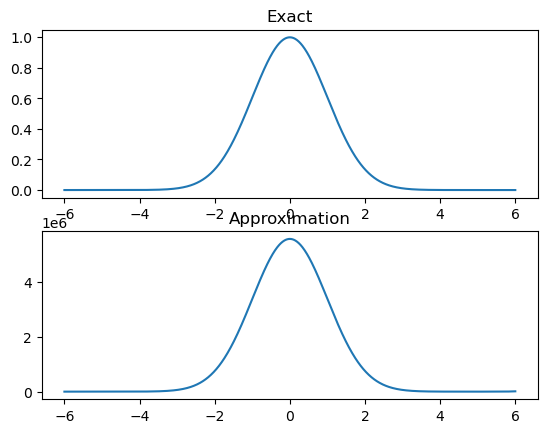

In [81]:
plt.subplot(2, 1, 1)
plt.plot(approx_xs, ys, label='exact')
plt.title('Exact')

plt.subplot(2, 1, 2)
plt.plot(approx_xs, approx_pos, label='approximation')
plt.title('Approximation')


plt.show()

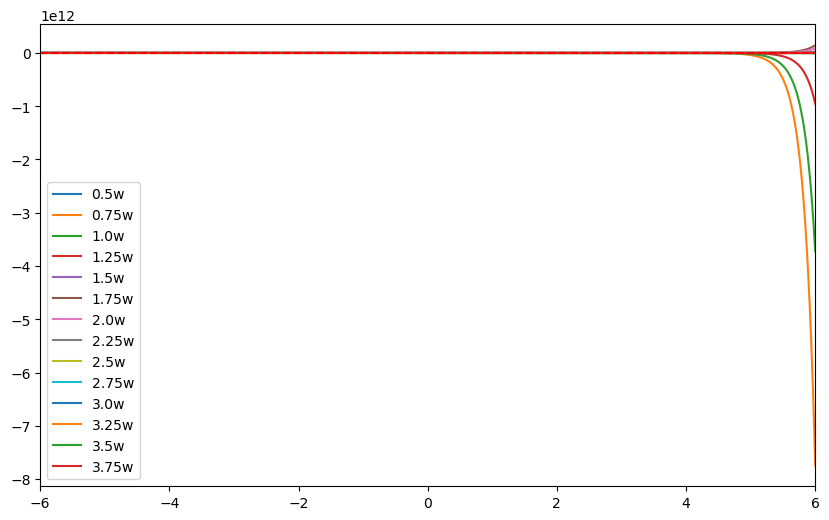

In [82]:
Es = np.arange(1/2 * w, 4 * w, 1/4 * w)

plt.figure(figsize=(10,6))
for i, E in enumerate(Es):
    xs, approx_pos, _ = approx_Schr([-a, a], 1000, 0, 1, E=E, V_int=1)

    plt.plot(xs, approx_pos, label = f'{E}w')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlim([approx_xs[0], approx_xs[-1]])
plt.legend()
plt.show()

### What’s special about the numerical solutions when the energy is exactly ω/2, 3ω/2, etc?

When the energy is exactly $\omega$ /2, 3 $\omega$ /2, etc, the numerical solutions don't blow up to infinity. From the plot above, you can see that when the energy is not an eigenvalue like the curves orange, green, and red with energies 3/4 $\omega$, $\omega$, and 5/4 $\omega$ the curves blow up.

## 2. The Shooting Method

### a)  Write a python function that numerically solves Equation (1) for a given energy E over the domain[a,b] and returns ψ(b), we can call this ψ(b;E).  Since $\Psi(a) = 0$, all $\frac{d}{dx}\Psi(a)$ does is control thenormalization of $\Psi$:  you can set it to 1.  Make a plot of $\Psi(b;E) vs E  for $U(x) = m\omega^2x^2/2$ and E ∈ [0, 3 $\omega$], using the integration domain from part 1.

In [242]:
def solver(interval, E_approx, N, V_int):
    xs, psis, _ = approx_Schr(interval, N, 0, 1, E_approx, V_int)
    return (xs, psis[-1])

In [249]:
a = 6;
xs, psi = solver([-a, a], E_approx = E, N = 1000, V_int=1) #[0, 1]
psi, xs

(np.float64(-3232561241.7270184),
 [-6.0,
  -5.988,
  -5.976000000000001,
  -5.964000000000001,
  -5.952000000000002,
  -5.940000000000002,
  -5.928000000000003,
  -5.916000000000003,
  -5.9040000000000035,
  -5.892000000000004,
  -5.880000000000004,
  -5.868000000000005,
  -5.856000000000005,
  -5.844000000000006,
  -5.832000000000006,
  -5.8200000000000065,
  -5.808000000000007,
  -5.796000000000007,
  -5.784000000000008,
  -5.772000000000008,
  -5.760000000000009,
  -5.748000000000009,
  -5.7360000000000095,
  -5.72400000000001,
  -5.71200000000001,
  -5.700000000000011,
  -5.688000000000011,
  -5.676000000000012,
  -5.664000000000012,
  -5.652000000000013,
  -5.640000000000013,
  -5.628000000000013,
  -5.616000000000014,
  -5.604000000000014,
  -5.592000000000015,
  -5.580000000000015,
  -5.568000000000016,
  -5.556000000000016,
  -5.5440000000000165,
  -5.532000000000017,
  -5.520000000000017,
  -5.508000000000018,
  -5.496000000000018,
  -5.484000000000019,
  -5.472000000000019,


In [246]:
w = 1;

Es = np.linspace(0, 3 * w, 100)

plt.figure(figsize=(10,6))

psis = []
for i, E in enumerate(Es):
    xs, psi = solver([-a, a], E_approx = E, N = 1000, V_int=1)
    psis.append(psi)

<Figure size 1000x600 with 0 Axes>

<>:2: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
<>:3: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
<>:4: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
<>:2: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
<>:3: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
<>:4: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
/var/folders/6y/t0pn3j7n35bdz5_644h0yzd00000gn/T/ipykernel_23582/1752145359.py:2: 

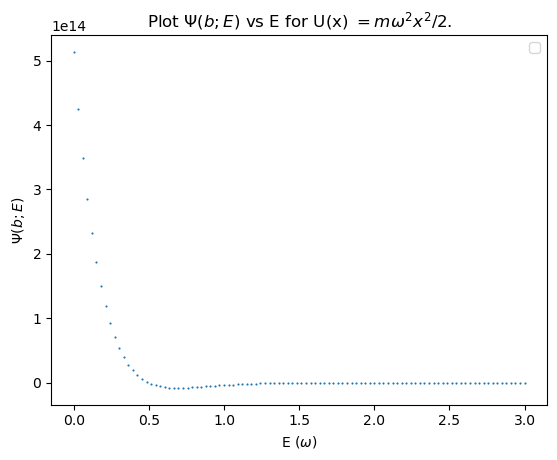

In [247]:
plt.scatter(Es, psis, s =.3, marker = 'x')
plt.ylabel(f'$\Psi(b;E)$')
plt.xlabel(f'E ($\omega$)')
plt.title(f'Plot $\Psi(b;E)$ vs E for U(x) $=m \omega^2 x^2/2$.')
plt.legend()
plt.show()

### b)  Our desired boundary condition is $\Psi(b) = 0$.  Write a python function that uses bisection to find aroot of $g(E) = \Psi(b;E)$ on the test interval $[E_{begin},E_{end}]$.  Test your function on the particle-in-a-box U (x) = 0, try to find the first few energy levels.  You’ll have to play with the search bounds,or test many intervals automatically.  Make a plot of Envs n, does it agree with expectations?

In [250]:
def bisection(f, interval, tol = 1e-12, max_iter = 100):
    a = float(interval[0])
    b = float(interval[-1])

    if np.sign(f(a)) == np.sign(f(b)):
        print("There are no roots in this interval.")
        return None
    
    for i in range(max_iter):
        c = (a + b)/2
        val_c = f(c)
        print(f'Checking if {c} is a root.')
        
        if abs(val_c) < tol:
            print(f"Successfully found a root: {c}.")
            return c
        
        if np.sign(f(a)) == np.sign(val_c):
            a = c
        else:
            b = c
    print("Max iterations reached.")
    return None

In [252]:
def find_root(interval, V):
    f = lambda x : solver([-a, a], E_approx = x, N = 1000, V_int = V)[-1]
    root = bisection(f, interval)
    return root

In [253]:
w = 1; E = [0, 10*w]
root = find_root(E, V=0)
root

Checking if 5.0 is a root.
Checking if 7.5 is a root.
Checking if 8.75 is a root.
Checking if 8.125 is a root.
Checking if 7.8125 is a root.
Checking if 7.65625 is a root.
Checking if 7.734375 is a root.
Checking if 7.6953125 is a root.
Checking if 7.71484375 is a root.
Checking if 7.705078125 is a root.
Checking if 7.7099609375 is a root.
Checking if 7.71240234375 is a root.
Checking if 7.711181640625 is a root.
Checking if 7.7105712890625 is a root.
Checking if 7.71087646484375 is a root.
Checking if 7.710723876953125 is a root.
Checking if 7.7106475830078125 is a root.
Checking if 7.710609436035156 is a root.
Checking if 7.710628509521484 is a root.
Checking if 7.710638046264648 is a root.
Checking if 7.710633277893066 is a root.
Checking if 7.710630893707275 is a root.
Checking if 7.71062970161438 is a root.
Checking if 7.710629105567932 is a root.
Checking if 7.710628807544708 is a root.
Checking if 7.71062895655632 is a root.
Checking if 7.710629031062126 is a root.
Checking if 7

7.710629071577841

In [254]:
E_ints = [[0, 10*w], [10*w, 20*w], [30*w, 50*w], [70*w, 80*w], [120*w, 150*w]]
roots = []

for E in E_ints:
    root = find_root(E, V=0)
    roots.append(root)

Checking if 5.0 is a root.
Checking if 7.5 is a root.
Checking if 8.75 is a root.
Checking if 8.125 is a root.
Checking if 7.8125 is a root.
Checking if 7.65625 is a root.
Checking if 7.734375 is a root.
Checking if 7.6953125 is a root.
Checking if 7.71484375 is a root.
Checking if 7.705078125 is a root.
Checking if 7.7099609375 is a root.
Checking if 7.71240234375 is a root.
Checking if 7.711181640625 is a root.
Checking if 7.7105712890625 is a root.
Checking if 7.71087646484375 is a root.
Checking if 7.710723876953125 is a root.
Checking if 7.7106475830078125 is a root.
Checking if 7.710609436035156 is a root.
Checking if 7.710628509521484 is a root.
Checking if 7.710638046264648 is a root.
Checking if 7.710633277893066 is a root.
Checking if 7.710630893707275 is a root.
Checking if 7.71062970161438 is a root.
Checking if 7.710629105567932 is a root.
Checking if 7.710628807544708 is a root.
Checking if 7.71062895655632 is a root.
Checking if 7.710629031062126 is a root.
Checking if 7

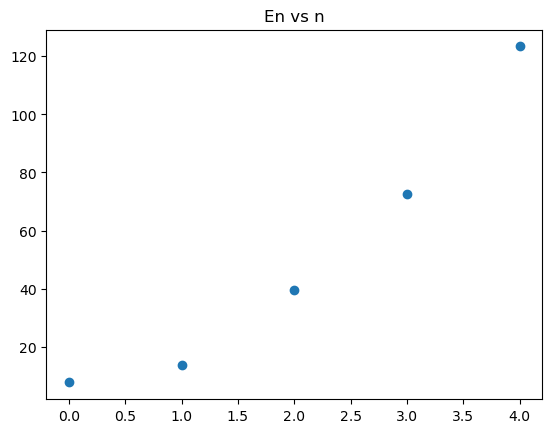

In [255]:
plt.scatter(range(len(roots)), roots)
plt.title("En vs n")
plt.show()

Yes, this agress with the expectation since the energy level of a particle in a box should scale $n^2$.

### c)  Use your shooting method on the harmonic oscillator. Find the first few energy levels, and make a plot of $E_n$ vs $n$. Find enough energy levels that they diverge from harmonic oscillator behaviour. Plot the wave function for one eigenstate below the divergence and one above, do they agree with expectations?

In [288]:
#E_ints = [[0, 5*w], [5*w, 8*w], [12*w, 13*w], [15*w, 16*w], [17*w, 20*w], [25*w, 27*w], [30*w, 33*w],[32*w, 35*w],[40*w, 45*w], [60*w, 80*w], [120*w, 140*w], [160*w, 180*w], [240*w, 260*w], [300*w, 320*w], [380*w, 400*w], [480*w, 500*w], [580*w, 600*w], [700*w, 720*w], [800*w, 840*w], [900*w, 1000*w], [1100*w, 1120*w], [1200*w, 1280*w], [1400*w, 1450*w], [1580*w, 1600*w], [1700*w, 1800*w], [1900*w, 2000*w], [2100*w, 2200*w], [2300*w, 2400*w], [2600*w, 2700*w], [2800*w, 2900*w]]
E_ints = [[0, 5*w], [5*w, 8*w], [8*w, 12*w], [12*w, 13*w], [15*w, 16*w], [17*w, 20*w], [25*w, 27*w],[30*w, 33*w] ,[32*w, 35*w] ,[40*w, 45*w] ,[60*w, 80*w] ,[80*w, 100*w] ,[100*w, 120*w],[ 120*w, 140*w]]
roots = []

for E in E_ints:
    root = find_root(E, V=1)
    roots.append(root)

Checking if 2.5 is a root.
Checking if 3.75 is a root.
Checking if 4.375 is a root.
Checking if 4.6875 is a root.
Checking if 4.53125 is a root.
Checking if 4.453125 is a root.
Checking if 4.4921875 is a root.
Checking if 4.51171875 is a root.
Checking if 4.501953125 is a root.
Checking if 4.4970703125 is a root.
Checking if 4.49951171875 is a root.
Checking if 4.500732421875 is a root.
Checking if 4.5001220703125 is a root.
Checking if 4.49981689453125 is a root.
Checking if 4.499969482421875 is a root.
Checking if 4.5000457763671875 is a root.
Checking if 4.500007629394531 is a root.
Checking if 4.499988555908203 is a root.
Checking if 4.499998092651367 is a root.
Checking if 4.500002861022949 is a root.
Checking if 4.500000476837158 is a root.
Checking if 4.499999284744263 is a root.
Checking if 4.4999998807907104 is a root.
Checking if 4.500000178813934 is a root.
Checking if 4.500000029802322 is a root.
Checking if 4.500000104308128 is a root.
Checking if 4.500000067055225 is a ro

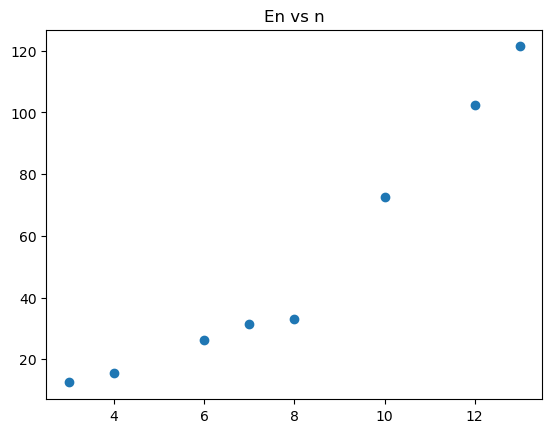

In [289]:
plt.scatter(range(len(roots)), roots)
plt.title("En vs n")
plt.show()

I am not sure if this looks right. I expect a linear scaling for harmonic oscillator for first few eigenvalues. That is not clear from the plot.

In [291]:
roots

[None,
 None,
 None,
 12.50388406785811,
 15.579548632863634,
 None,
 26.12946888341685,
 31.28523412816503,
 33.147420462728405,
 None,
 72.45526002978295,
 None,
 102.33882128617552,
 121.34675521247118]

In [ ]:
roots[4], roots[6],

(15.579548632863634, 26.12946888341685)

In [304]:
approx_xs, approx_pos1, approx_vel = approx_Schr([-a, a], 1000, 0, 1, E=roots[4], V_int=1)
approx_xs, approx_pos2, approx_vel = approx_Schr([-a, a], 1000, 0, 1, E=roots[6], V_int=1)

<>:7: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
<>:7: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
/var/folders/6y/t0pn3j7n35bdz5_644h0yzd00000gn/T/ipykernel_23582/4052057765.py:7: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
  plt.ylabel(f'$\Psi(x)$')


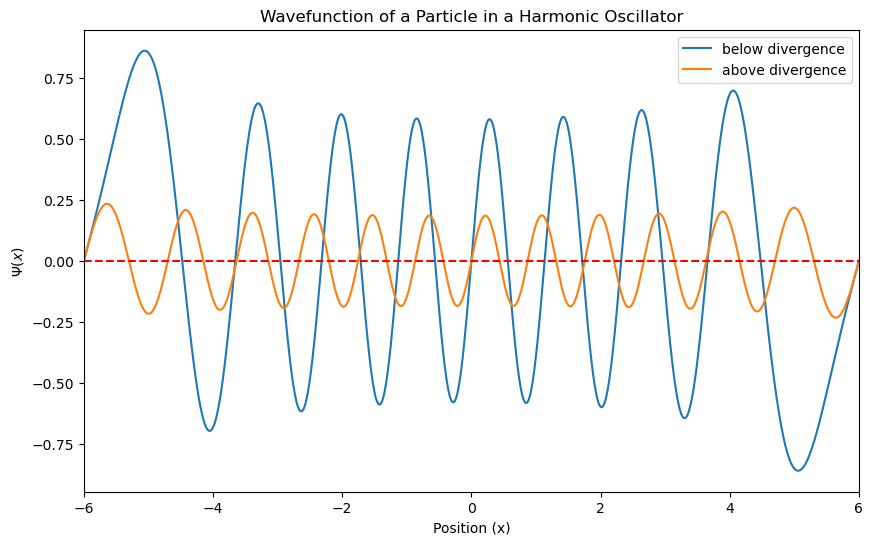

In [305]:
plt.figure(figsize=(10, 6))
plt.plot(approx_xs, approx_pos1, label='below divergence')
plt.plot(approx_xs, approx_pos2, label='above divergence')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlim([approx_xs[0], approx_xs[-1]])
plt.title("Wavefunction of a Particle in a Harmonic Oscillator")
plt.ylabel(f'$\Psi(x)$')
plt.xlabel("Position (x)")

plt.legend()
plt.show()

The main and almost difference is the behaviour at the boundary. Below divergence the amplitude increases near the boundary, while the above the divergence it maintains a constant maximum throughout. I am not sure of what I should expect!